<a href="https://colab.research.google.com/github/PedroBalduino42/MachineLearning/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_por_imagens_Pedro_Balduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

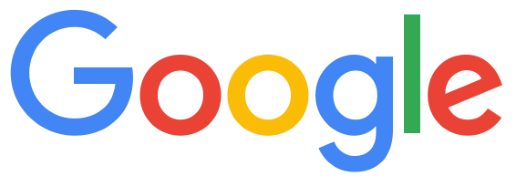

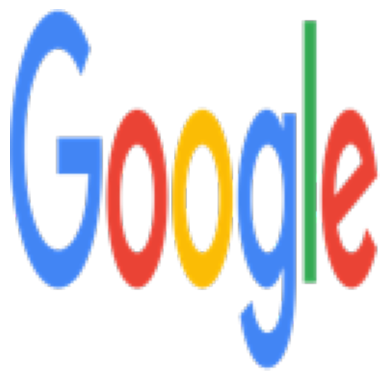

In [31]:
# Instale as bibliotecas necessárias
!pip install pillow

import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

# Função para baixar e abrir uma imagem da internet
def carregar_imagem(url):
    try:
        response = urllib.request.urlopen(url)
        img = Image.open(response)
        return img
    except urllib.error.HTTPError as e:
        print(f"Erro ao carregar a imagem: {e}")
        # Retorne uma imagem padrão ou None em caso de erro
        # Exemplo: return Image.new('RGB', (128, 128), color='white')
        return None

# URL da imagem que você deseja carregar
# Substitua por uma URL válida de uma imagem
url_imagem = 'https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png'

# Carregar e exibir a imagem
imagem = carregar_imagem(url_imagem)

if imagem:  # Verifica se a imagem foi carregada com sucesso
    plt.imshow(imagem)
    plt.axis('off')  # Opcional: remove os eixos
    plt.show()

    # Processamento adicional (exemplo: redimensionar a imagem)
    imagem_redimensionada = imagem.resize((128, 128))
    plt.imshow(imagem_redimensionada)
    plt.axis('off')
    plt.show()
else:
    print("Não foi possível carregar a imagem.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Similaridade (distância euclidiana): 0.0


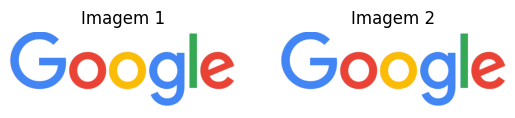

In [33]:
# Instale as bibliotecas necessárias
!pip install tensorflow pillow

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

# Função para carregar e processar uma imagem
def carregar_e_processar_imagem(url, target_size=(299, 299)):
    response = urllib.request.urlopen(url)
    img = Image.open(response).convert('RGB')
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Função para extrair vetores de características usando InceptionV3
def extrair_vetores_de_caracteristicas(model, img_array):
    features = model.predict(img_array)
    return features.flatten()

# Função para calcular a similaridade usando a distância euclidiana
def calcular_similaridade(vetor1, vetor2):
    return np.linalg.norm(vetor1 - vetor2)

# Carregar o modelo InceptionV3 pré-treinado
base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# URLs das imagens que você deseja comparar
url_imagem1 = 'https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png'
url_imagem2 = 'https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png'

# Carregar e processar as imagens
img_array1 = carregar_e_processar_imagem(url_imagem1)
img_array2 = carregar_e_processar_imagem(url_imagem2)

# Extrair vetores de características
vetor1 = extrair_vetores_de_caracteristicas(model, img_array1)
vetor2 = extrair_vetores_de_caracteristicas(model, img_array2)

# Calcular a similaridade
similaridade = calcular_similaridade(vetor1, vetor2)
print(f'Similaridade (distância euclidiana): {similaridade}')

# Exibir as imagens
img1 = Image.open(urllib.request.urlopen(url_imagem1))
img2 = Image.open(urllib.request.urlopen(url_imagem2))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Imagem 1')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Imagem 2')

plt.show()